In [1]:
# Nativos
import os
import sys
            
#calculo
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
from IPython.display import display

#grafico
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")
pylab.rcParams['figure.figsize'] = 8,6

#warning ignore future
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Utilitarios propios
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
if BASE_DIR not in sys.path: sys.path.append(BASE_DIR)

from utils import *
from graphs import *

In [2]:
%%time
train = pd.read_csv('train_part_1_v2.csv') # review part_data.ypnb
test = pd.read_csv('data_work/test_public_v2.csv')

display(train.head())
display(test.head())

,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P,sWeight,particle_type,label,kinWeight,weight
0,0,47,31,13,15,2.00,1.58,1.15,1.13,8,...,[ 3 11 2 7 7 5],[0 8 0 0 0 0],[0 0 1 2 2 3],1764.93,12646.82,1.20,1,1,1.86,2.23
1,1,92,19,11,26,2.75,2.79,1.36,1.23,8,...,[ 9 10 8 4],[ 1 -1 0 4],[0 1 2 3],4511.28,28556.63,1.15,1,1,1.86,2.13
2,2,100,21,11,12,2.93,2.43,1.18,1.08,8,...,[10 4 13 13 3 3 15 3 5],[ 0 4 10 6 0 -4 15 0 0],[0 0 1 1 1 1 1 2 3],1062.55,17491.70,1.14,1,1,3.78,4.31
3,3,74,27,13,20,3.07,2.52,1.92,1.30,8,...,[6 6 4 8 2],[ 1 -6 0 0 0],[0 0 1 2 3],4991.07,37192.87,0.86,1,1,1.86,1.61
4,4,18,22,8,8,1.83,1.95,1.12,1.75,8,...,[ 5 10 6 6 5 5],[ 0 5 -2 0 0 0],[0 0 0 1 2 3],1347.70,16688.75,1.11,1,1,1.86,2.06


,id,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,...,FOI_hits_Y,FOI_hits_Z,FOI_hits_DX,FOI_hits_DY,FOI_hits_DZ,FOI_hits_T,FOI_hits_DT,FOI_hits_S,PT,P
0,0,55,12,10,15,2.13,1.17,1.50,1.60,8,...,[-1849.3373 -1826.5162 -1833.7968 -1982.7971 -...,[15396.441 16315.722 16404.695 16521.16 17597...,[12.75 13.75 13.75 13.75 59. 63. ],[63.078957 68.078926 68.078926 68.078926 73.07...,[33.727364 33.74537 33.74537 33.74537 33.76...,[ 6 13 2 2 7 3],[-1 0 -2 -1 0 0],[0 1 1 1 2 3],1174.48,6884.50
1,1,43,18,12,15,2.70,1.11,1.33,1.60,8,...,[-383.5468 -222.24156 -240.82657 -240.82657 -...,[15401.72 15117.299 16321.432 16321.432 17514...,[ 6.375 6.375 6.875 82.5 29.5 29.5 31....,[126.27855 31.479162 33.979145 33.979145 ...,[33.95495 33.613575 33.622578 33.622578 33.63...,[ 6 4 5 9 12 6 3],[ 6 0 -2 9 -1 -1 0],[0 0 1 1 2 2 3],4344.64,48769.53
2,2,90,34,19,29,1.80,2.06,1.21,1.34,8,...,[-1628.1324 -1758.3168 -1887.1799 -2014.6083],[15112.236 16315.968 17508.303 18715.945],[ 25.5 27.5 118. 126. ],[126.27855 136.27849 146.27841 156.27835],[33.95495 33.99096 34.026966 34.062977],[ 3 10 7 7],[-1 0 0 0],[0 1 2 3],4109.81,20296.05
3,3,141,43,15,16,4.61,2.74,1.47,1.12,8,...,[372.85458 537.1497 483.45386 483.45386 520.7...,[15119.441 15321.034 15119.84 15119.84 16324...,[ 3.2083333 76.5 3.2083333 3.2083333 ...,[126.27855 31.479162 15.679264 15.679264 ...,[33.95495 33.613575 33.55668 33.55668 33.56...,[14 13 3 4 5 6 8 7 3],[14 13 1 2 1 0 2 7 0],[0 0 0 0 1 2 2 2 3],940.24,26062.05
4,4,22,18,8,9,1.64,2.44,1.00,1.56,8,...,[264.6528 367.2695 284.41754 305.50333 328.0...,[15203.053 16323.622 16407.324 17600.2 18808...,[ 3.2083333 82.5 3.4583333 14.833333 1...,[15.679264 33.979145 16.929256 18.179249 19.42...,[33.55668 33.622578 33.56118 33.56568 33.57...,[ 8 5 7 5 2 13 5 6],[ 1 5 0 5 2 13 5 6],[0 1 1 2 3 3 3 3],1386.38,59872.34


CPU times: user 1min 11s, sys: 5.8 s, total: 1min 16s
Wall time: 1min 47s


## Reduciendo tamaño de memoria usado

In [3]:
train = reduce_size_data(train, description=False)

Tamaño de uso actual : PROFUNDO 4123.073541641235 MB REAL 1661.8970489501953 MB
Tamaño de uso final : PROFUNDO 3234.9973468780518 MB REAL 773.8208541870117 MB


In [4]:
test = reduce_size_data(test, description=False)

Tamaño de uso actual : PROFUNDO 1072.2230081558228 MB REAL 415.47496795654297 MB
Tamaño de uso final : PROFUNDO 853.406231880188 MB REAL 196.6581916809082 MB


## Analisis de nulos

In [5]:
train.shape, test.shape

((2722852, 80), (726095, 75))

In [7]:
display_horizontal(
    null_verificator(train), null_verificator(test)
)

,0
msje,DATA LIMPIA DE NULOS
,0
msje,DATA LIMPIA DE NULOS


* Recordar que no debemos confiarnos de este resultado de no nulidad ya que colocan -9999 a sus nulos

## Analizando la diferencia entre las columnas de train y test

In [6]:
set_cols_train = set(train.columns)
set_cols_test = set(test.columns)

Columnas en 'train' y no 'test'

In [8]:
cols_diff = set_cols_train - set_cols_test
cols_diff.remove('label')
cols_diff

{'kinWeight', 'particle_type', 'sWeight', 'weight'}

Columnas en 'test' y no en 'train'

In [9]:
set_cols_test - set_cols_train

set()

Columnas comunes

In [10]:
set_cols_common = set_cols_train | set_cols_test
print(set_cols_common)

{'avg_cs[0]', 'MatchedHit_DX[1]', 'MatchedHit_DY[2]', 'Lextra_X[0]', 'FOI_hits_DX', 'avg_cs[3]', 'NShared', 'MatchedHit_TYPE[2]', 'id', 'Lextra_Y[2]', 'MatchedHit_T[2]', 'MatchedHit_DX[3]', 'MatchedHit_DT[1]', 'Lextra_Y[0]', 'label', 'FOI_hits_Y', 'MatchedHit_Y[1]', 'MatchedHit_T[0]', 'FOI_hits_T', 'Lextra_Y[1]', 'MatchedHit_TYPE[0]', 'MatchedHit_DY[1]', 'Mextra_DY2[0]', 'particle_type', 'FOI_hits_DZ', 'ncl[0]', 'MatchedHit_DY[3]', 'Lextra_Y[3]', 'Mextra_DX2[3]', 'Mextra_DX2[1]', 'MatchedHit_DZ[1]', 'ndof', 'MatchedHit_TYPE[3]', 'Lextra_X[2]', 'Mextra_DX2[0]', 'MatchedHit_DT[3]', 'MatchedHit_DZ[0]', 'MatchedHit_T[3]', 'FOI_hits_Z', 'P', 'kinWeight', 'MatchedHit_DX[0]', 'MatchedHit_X[0]', 'MatchedHit_Z[3]', 'MatchedHit_DT[2]', 'MatchedHit_Y[3]', 'MatchedHit_DX[2]', 'MatchedHit_X[3]', 'ncl[3]', 'FOI_hits_X', 'MatchedHit_DZ[3]', 'FOI_hits_DT', 'Lextra_X[3]', 'FOI_hits_S', 'Mextra_DY2[2]', 'ncl[1]', 'sWeight', 'MatchedHit_X[2]', 'MatchedHit_Y[0]', 'MatchedHit_Z[0]', 'MatchedHit_DY[0]', 'Ma

## Significado de las columnas no comunes

* kinWeight : un componente del peso de ejemplo que iguala los observables cinemáticos entre la señal y el fondo
* particle_type: entero en {0,1,2} - tipo de partícula. 0 - pión, 1 - muón, 2 - protón. Disponible solo para el conjunto de datos de entrenamiento.
* sWeight: un componente de la ponderación de ejemplo que da cuenta de la incertidumbre en el etiquetado.
* weight:  peso de ejemplo, usado tanto en entrenamiento como en evaluación. Producto de peso y par. Peso.

## Significado target

* label: 0 es fondo (piones y protones), 1 es señal (muones).

## Significado columnas comunes

 * Lextra : DECIMAL, coordenadas de la intersección de extrapolación de la pista con la N-ésima estación.
 * Mextra : DECIMAL, incertidumbre de dispersión múltiple para la coordenada {X, Y, Z} cuadrada de la extrapolación de la pista.
 * MatchedHit : DECEIMAL, coordenadas del acierto en la N-ésima estación que un algoritmo de seguimiento basado en la física asociado con la pista. Vea el póster sobre el algoritmo.
    coordenadas del acierto en la N-ésima estación que un algoritmo de seguimiento basado en la física asociado con la pista. Vea el póster sobre el algoritmo.
 * MatchedHit_TYPE {1, 2} CATEGORICO- si se cruza el hit coincidente. 1 significa sin cruzar, 2 significa cruzado. Vea las páginas 6-8 aquí
 * MatchedHit_T : ENTERO en [1, 20] - temporización del acierto coincidente.
 * MatchedHit_D : DECIMAL, Incertidumbre de las coordenadas de coincidencia coincidentes.
 * MatchedHit_DT : ENTERO,delta time for the matched hit in the N-th station.
 * FOI_hits_N : ENTERO, número de hits dentro de un cono definido por la física alrededor de la pista (también conocido como Campo de interés, FOI)
 * FOI_hits_{,D} : LISTA, matriz de flotación de tamaño FOI_hits_N - igual que MatchedHit {, D} {X, Y, Z, T}, por golpe.
 * FOI_hits_S : ENTERO en {0, 1, 2, 3} - estaciones de los FOI hits.
 * ncl :  ENTERO, número de grupos en la N-ésima estación (variable de alto nivel).
 * avg_cs : DECIMAL, tamaño promedio del grupo en la N-ésima estación (variable de alto nivel).
 * ndof : ENTERO,  en {4, 6, 8} - número de grados de libertad utilizados en χ 2  computación, una función del momento.
 * NShared : ENTERO, número de hits más cercanos compartidos con las pistas vecinas. Vea las páginas 10-11 aquí.
 * P : DECIMAL, módulo de impulso, MeV / c
 * PT :DECIMAL componente del momento transversal (es decir, perpendicular) a la línea del haz, MeV / c.

OJO: Todos los null tienen -9999

### Eliminado columnas de Train que no estan en Test

In [11]:
"""
for col in cols_diff:
    del train[col]
"""

'\nfor col in cols_diff:\n    del train[col]\n'

## Analisis descriptivo 

In [12]:
percentiles = [.1, .25, .50, .75, .90]
train.describe(percentiles=percentiles).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
id,2722852.00,1361425.50,786019.81,0.00,272285.10,680712.75,1361425.50,2042138.25,2450565.90,2722851.00
ncl[0],2722852.00,62.78,32.23,2.00,26.00,38.00,58.00,82.00,107.00,334.00
ncl[1],2722852.00,19.53,12.69,0.00,6.00,10.00,17.00,26.00,37.00,205.00
ncl[2],2722852.00,12.45,7.46,0.00,5.00,7.00,11.00,16.00,23.00,91.00
ncl[3],2722852.00,13.01,6.38,0.00,6.00,8.00,12.00,16.00,22.00,82.00
avg_cs[0],2722852.00,2.47,0.66,1.00,1.71,2.01,2.39,2.82,3.29,13.33
avg_cs[1],2722852.00,2.12,0.77,0.00,1.29,1.57,2.00,2.50,3.07,28.20
avg_cs[2],2722852.00,1.45,0.37,0.00,1.00,1.19,1.38,1.64,1.90,14.75
avg_cs[3],2722852.00,1.36,0.43,0.00,1.00,1.12,1.29,1.50,1.71,22.67
ndof,2722852.00,7.93,0.40,4.00,8.00,8.00,8.00,8.00,8.00,8.00


In [13]:
test.describe(percentiles=percentiles).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
id,726095.00,363047.00,209605.72,0.00,72609.40,181523.50,363047.00,544570.50,653484.60,726094.00
ncl[0],726095.00,62.81,32.26,2.00,26.00,39.00,58.00,82.00,107.00,285.00
ncl[1],726095.00,19.55,12.68,0.00,6.00,10.00,17.00,26.00,37.00,196.00
ncl[2],726095.00,12.45,7.45,0.00,5.00,7.00,11.00,16.00,23.00,84.00
ncl[3],726095.00,13.01,6.38,0.00,6.00,8.00,12.00,16.00,22.00,81.00
avg_cs[0],726095.00,2.47,0.66,1.00,1.71,2.01,2.39,2.82,3.30,10.90
avg_cs[1],726095.00,2.12,0.78,0.00,1.29,1.57,2.00,2.50,3.08,25.67
avg_cs[2],726095.00,1.45,0.37,0.00,1.00,1.19,1.39,1.64,1.90,9.57
avg_cs[3],726095.00,1.36,0.43,0.00,1.00,1.12,1.29,1.50,1.71,16.50
ndof,726095.00,7.93,0.40,4.00,8.00,8.00,8.00,8.00,8.00,8.00


In [14]:
cols_num = train.describe().columns.values
print(cols_num)

['id' 'ncl[0]' 'ncl[1]' 'ncl[2]' 'ncl[3]' 'avg_cs[0]' 'avg_cs[1]'
 'avg_cs[2]' 'avg_cs[3]' 'ndof' 'MatchedHit_TYPE[0]' 'MatchedHit_TYPE[1]'
 'MatchedHit_TYPE[2]' 'MatchedHit_TYPE[3]' 'MatchedHit_X[0]'
 'MatchedHit_X[1]' 'MatchedHit_X[2]' 'MatchedHit_X[3]' 'MatchedHit_Y[0]'
 'MatchedHit_Y[1]' 'MatchedHit_Y[2]' 'MatchedHit_Y[3]' 'MatchedHit_Z[0]'
 'MatchedHit_Z[1]' 'MatchedHit_Z[2]' 'MatchedHit_Z[3]' 'MatchedHit_DX[0]'
 'MatchedHit_DX[1]' 'MatchedHit_DX[2]' 'MatchedHit_DX[3]'
 'MatchedHit_DY[0]' 'MatchedHit_DY[1]' 'MatchedHit_DY[2]'
 'MatchedHit_DY[3]' 'MatchedHit_DZ[0]' 'MatchedHit_DZ[1]'
 'MatchedHit_DZ[2]' 'MatchedHit_DZ[3]' 'MatchedHit_T[0]' 'MatchedHit_T[1]'
 'MatchedHit_T[2]' 'MatchedHit_T[3]' 'MatchedHit_DT[0]' 'MatchedHit_DT[1]'
 'MatchedHit_DT[2]' 'MatchedHit_DT[3]' 'Lextra_X[0]' 'Lextra_X[1]'
 'Lextra_X[2]' 'Lextra_X[3]' 'Lextra_Y[0]' 'Lextra_Y[1]' 'Lextra_Y[2]'
 'Lextra_Y[3]' 'NShared' 'Mextra_DX2[0]' 'Mextra_DX2[1]' 'Mextra_DX2[2]'
 'Mextra_DX2[3]' 'Mextra_DY2[0]' 'Mextra_DY2

In [15]:
train.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
FOI_hits_X,2722852,1748583,[2468.45 2716.31 2943.6 3144.22],705
FOI_hits_Y,2722852,1282035,[-2139.3484 -2308.2937 -2477.1694 -2646.4604],4851
FOI_hits_Z,2722852,1278225,[15196.296 16402.988 17595.979 18804.27 ],4851
FOI_hits_DX,2722852,380657,[ 25.5 27.5 118. 126. ],209771
FOI_hits_DY,2722852,336492,[126.27855 136.27849 146.27841 156.27835],210961
FOI_hits_DZ,2722852,336391,[33.95495 33.99096 34.026966 34.062977],210961
FOI_hits_T,2722852,1668361,[6 6 6 6],545
FOI_hits_DT,2722852,1324623,[0 0 0 0],62025
FOI_hits_S,2722852,44818,[0 1 2 3],542831


In [16]:
test.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
FOI_hits_X,726095,525226,[2468.45 2716.31 2943.6 3144.22],179
FOI_hits_Y,726095,395589,[-2139.3484 -2308.2937 -2477.1694 -2646.4604],1333
FOI_hits_Z,726095,394572,[15196.296 16402.988 17595.979 18804.27 ],1333
FOI_hits_DX,726095,126791,[ 25.5 27.5 118. 126. ],55953
FOI_hits_DY,726095,113273,[126.27855 136.27849 146.27841 156.27835],56318
FOI_hits_DZ,726095,113244,[33.95495 33.99096 34.026966 34.062977],56318
FOI_hits_T,726095,512878,[6 5 6 6],160
FOI_hits_DT,726095,392094,[0 0 0 0],16606
FOI_hits_S,726095,20369,[0 1 2 3],144671


## Verificando unicidad de columnas numéricas

In [18]:
def unique_size(data, col):
    return data[col].unique().shape[0]

for col in cols_num:
    if col not in ['kinWeight', 'particle_type', 'sWeight', 'weight', 'label']:
        print(col ,'-->  train:: ', unique_size(train, col), '  test:: ',unique_size(test, col))

id -->  train::  2722852   test::  726095
ncl[0] -->  train::  271   test::  255
ncl[1] -->  train::  142   test::  131
ncl[2] -->  train::  82   test::  76
ncl[3] -->  train::  76   test::  70
avg_cs[0] -->  train::  35460   test::  25356
avg_cs[1] -->  train::  9854   test::  6948
avg_cs[2] -->  train::  2086   test::  1636
avg_cs[3] -->  train::  2313   test::  1848
ndof -->  train::  3   test::  3
MatchedHit_TYPE[0] -->  train::  2   test::  2
MatchedHit_TYPE[1] -->  train::  2   test::  2
MatchedHit_TYPE[2] -->  train::  3   test::  3
MatchedHit_TYPE[3] -->  train::  3   test::  3
MatchedHit_X[0] -->  train::  3987   test::  3726
MatchedHit_X[1] -->  train::  3697   test::  3469
MatchedHit_X[2] -->  train::  905   test::  884
MatchedHit_X[3] -->  train::  926   test::  903
MatchedHit_Y[0] -->  train::  1346   test::  1226
MatchedHit_Y[1] -->  train::  909   test::  891
MatchedHit_Y[2] -->  train::  906   test::  891
MatchedHit_Y[3] -->  train::  942   test::  924
MatchedHit_Z[0] -

## Validando los numericos con poca unicidad

In [19]:
cols_few_categories = [
    'NShared', 'MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]',
    'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]', 'ndof'
]

for col in cols_few_categories:
    display_horizontal(
        train[col].value_counts(dropna=False)[:20],
        test[col].value_counts(dropna=False)[:20]
    )

,NShared
0,2497707
1,213261
2,11024
3,765
4,85
5,7
6,2
7,1
,NShared
0,666228


,MatchedHit_TYPE[0]
2,2620753
1,102099
,MatchedHit_TYPE[0]
2,698844
1,27251


,MatchedHit_TYPE[1]
2,2626053
1,96799
,MatchedHit_TYPE[1]
2,700191
1,25904


,MatchedHit_TYPE[2]
2,2222188
1,455749
0,44915
,MatchedHit_TYPE[2]
2,592844
1,121339
0,11912


,MatchedHit_TYPE[3]
2,2194598
1,479332
0,48922
,MatchedHit_TYPE[3]
2,585627
1,127418
0,13050


,ndof
8,2638553
6,74761
4,9538
,ndof
8,703636
6,19956
4,2503


NShared, ndof: Son variables numéricas ordinales, ya que su aumento de cantidad esta en relación con sus significado por lo tanto las dejamos tal cual.

In [20]:
train['label'].value_counts(dropna=False)

1    2512449
0     210403
Name: label, dtype: int64

En base a la teoria si 'Nshared' es 0 hay mayor probabilidad que sea un MUON real

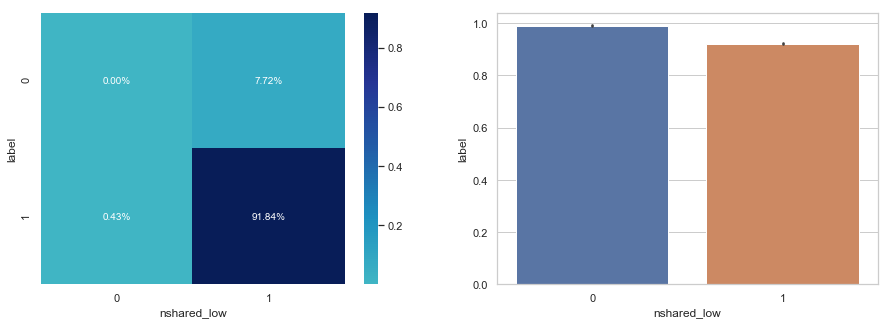

In [24]:
def rule_nshared(val):
    if val <= 1:
        return 1
    else:
        return 0

train['nshared_low'] = train['NShared'].apply(rule_nshared)
flash_analysis(train, 'nshared_low', 'label')

Retiramos la variable de origen 

In [25]:
del train['NShared']
del test['NShared']

In [15]:
def flash_numeric(data, col_init, col_out, **kwargs):
    color_label = kwargs.get('color_label', 'black')
    bins = kwargs.get('bins', 3)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    sns.violinplot(x=col_out, y=col_init, data=data, ax=axes[0])
    sns.lineplot(x=col_init, y=col_out, data=data, ax=axes[1])

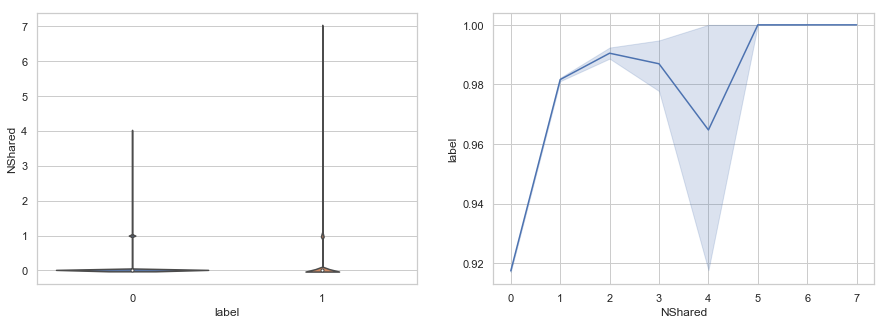

In [16]:
flash_numeric(train, 'NShared', 'label')

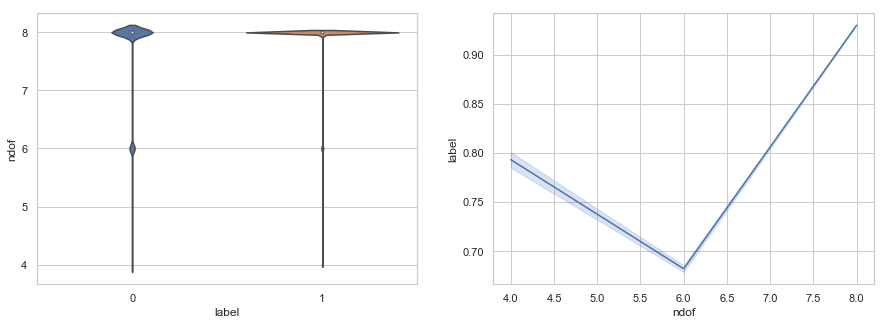

In [17]:
flash_numeric(train, 'ndof', 'label')

In [18]:
train['label'].value_counts(dropna=False)

1    2512449
0     210403
Name: label, dtype: int64

MatchedHit_TYPE: Es una variable dicotómica de cruce o no cruce por lo tanto pasaran a variables categoricas

In [19]:
for col in ['MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]','MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]']:
    train[col] = train[col].astype(str)
    test[col] = test[col].astype(str)

## Lanzamos denuevo un analisis descriptivo en las categoricas

In [24]:
train.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
MatchedHit_TYPE[0],2722852,2,2,2620753
MatchedHit_TYPE[1],2722852,2,2,2626053
MatchedHit_TYPE[2],2722852,3,2,2222188
MatchedHit_TYPE[3],2722852,3,2,2194598
FOI_hits_X,2722852,1748583,[2468.45 2716.31 2943.6 3144.22],705
FOI_hits_Y,2722852,1282035,[-2139.3484 -2308.2937 -2477.1694 -2646.4604],4851
FOI_hits_Z,2722852,1278225,[15196.296 16402.988 17595.979 18804.27 ],4851
FOI_hits_DX,2722852,380657,[ 25.5 27.5 118. 126. ],209771
FOI_hits_DY,2722852,336492,[126.27855 136.27849 146.27841 156.27835],210961
FOI_hits_DZ,2722852,336391,[33.95495 33.99096 34.026966 34.062977],210961


In [25]:
test.describe(include=['object', 'bool', 'category']).T

,count,unique,top,freq
MatchedHit_TYPE[0],726095,2,2,698844
MatchedHit_TYPE[1],726095,2,2,700191
MatchedHit_TYPE[2],726095,3,2,592844
MatchedHit_TYPE[3],726095,3,2,585627
FOI_hits_X,726095,525226,[2468.45 2716.31 2943.6 3144.22],179
FOI_hits_Y,726095,395589,[-2139.3484 -2308.2937 -2477.1694 -2646.4604],1333
FOI_hits_Z,726095,394572,[15196.296 16402.988 17595.979 18804.27 ],1333
FOI_hits_DX,726095,126791,[ 25.5 27.5 118. 126. ],55953
FOI_hits_DY,726095,113273,[126.27855 136.27849 146.27841 156.27835],56318
FOI_hits_DZ,726095,113244,[33.95495 33.99096 34.026966 34.062977],56318


## Analisis de las columnas en forma de lista

In [20]:
print(
    [col for col in train.columns if (col.startswith('MatchedHit') or col.startswith('FOI_hits'))]
)

['MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]', 'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]', 'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]', 'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]', 'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]', 'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]', 'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]', 'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]', 'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]', 'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'FOI_hits_N', 'FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ', 'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']


In [21]:
train[
    [col for col in train.columns 
     if (col.startswith('MatchedHit') or col.startswith('FOI_hits')) and 'X' in col
    ]
].head(10)

,MatchedHit_X[0],MatchedHit_X[1],MatchedHit_X[2],MatchedHit_X[3],MatchedHit_DX[0],MatchedHit_DX[1],MatchedHit_DX[2],MatchedHit_DX[3],FOI_hits_X,FOI_hits_DX
0,-2685.08,-2954.30,-3140.97,-3609.17,25.50,27.50,118.00,126.00,[-2685.08 -2583.08 -2954.3 -3376.97 -3140.97 ...,[ 25.5 25.5 27.5 118. 118. 126. ]
1,739.55,852.51,827.00,758.72,25.50,27.50,118.00,756.00,[739.55 852.51 827. 758.72],[ 25.5 27.5 118. 756. ]
2,-1595.13,-1748.45,-1933.97,-2066.67,12.75,13.75,59.00,63.00,[-1595.13 -681.58 -1775.95 -1761.95 -1748.45 ...,[12.75 76.5 13.75 13.75 13.75 13.75 20.75 59....
3,-1708.83,-1816.95,-1933.97,-2066.67,12.95,13.75,59.00,63.00,[-1708.8291 -1708.432 -1816.95 -1933.97 -...,[12.948485 12.948485 13.75 59. 63. ...
4,-1504.63,-1651.95,-1815.97,-1940.67,12.75,13.75,59.00,63.00,[-1544.13 -1518.63 -1504.63 -1651.95 -1815.97 ...,[12.75 12.75 12.75 13.75 59. 63. ]
5,-2014.63,-2201.95,-2405.97,-2570.67,12.75,13.75,59.00,63.00,[-2014.63 -2229.45 -2229.45 -2201.95 -2201.95 ...,[12.75 13.75 13.75 13.75 13.75 59. 63. ]
6,-953.08,-1028.40,-1072.17,-1145.57,25.50,27.50,118.00,126.00,[ -953.08 -941.78 -1028.4 -973.4 -1017.1 ...,[ 25.5 25.5 27.5 27.5 27.5 27.5 118. 118...
7,531.08,547.87,554.73,561.89,6.38,3.46,14.83,15.83,[531.075 500.05832 540.64166 503.885 517.6...,[ 6.375 3.2083333 3.2083333 6.875 ...
8,1875.60,2079.06,2276.60,2433.82,12.75,13.75,59.00,63.00,[1875.6 2079.06 2276.6 2433.82],[12.75 13.75 59. 63. ]
9,553.00,595.96,654.60,700.32,12.75,13.75,59.00,63.00,[553. 595.96 654.6 700.32],[12.75 13.75 59. 63. ]


Se aprecia que las columnas FOI_hits_ y FOI_hits_D se componen de otras columnas por lo tanto se procede a eliminarse

In [22]:
for col in ['FOI_hits_X', 'FOI_hits_Y', 'FOI_hits_Z', 
            'FOI_hits_DX', 'FOI_hits_DY', 'FOI_hits_DZ']:
    if col in train.columns:
        del train[col]
    if col in test.columns:
        del test[col]

In [23]:
[col for col in train.columns if col.startswith('FOI_hits')]

['FOI_hits_N', 'FOI_hits_T', 'FOI_hits_DT', 'FOI_hits_S']

In [24]:
train[
    [col for col in train.columns 
     if (col.startswith('MatchedHit') or col.startswith('FOI_hits')) and '_T' in col.upper()
    ]
].head(3)

,MatchedHit_TYPE[0],MatchedHit_TYPE[1],MatchedHit_TYPE[2],MatchedHit_TYPE[3],MatchedHit_T[0],MatchedHit_T[1],MatchedHit_T[2],MatchedHit_T[3],FOI_hits_T
0,2,2,2,2,3,2,7,5,[ 3 11 2 7 7 5]
1,2,2,2,1,9,10,8,4,[ 9 10 8 4]
2,2,2,2,2,10,3,3,5,[10 4 13 13 3 3 15 3 5]


In [25]:
train[
    [col for col in train.columns 
     if (col.startswith('MatchedHit') or col.startswith('FOI_hits')) and '_DT' in col.upper()
    ]
].head(3)

,MatchedHit_DT[0],MatchedHit_DT[1],MatchedHit_DT[2],MatchedHit_DT[3],FOI_hits_DT
0,0,0,0,0,[0 8 0 0 0 0]
1,1,-1,0,4,[ 1 -1 0 4]
2,0,0,0,0,[ 0 4 10 6 0 -4 15 0 0]


In [26]:
train[
    [col for col in train.columns 
     if (col.startswith('MatchedHit') or col.startswith('FOI_hits')) and '_N' in col.upper()
    ]
].head(3)

,FOI_hits_N
0,6
1,4
2,9


In [27]:
for col in ['FOI_hits_T', 'FOI_hits_DT']:
    if col in train.columns:
        del train[col]
    if col in test.columns:
        del test[col]

In [28]:
train[
    [col for col in train.columns  if '_S' in col.upper()]
].head(10)

,FOI_hits_S
0,[0 0 1 2 2 3]
1,[0 1 2 3]
2,[0 0 1 1 1 1 1 2 3]
3,[0 0 1 2 3]
4,[0 0 0 1 2 3]
5,[0 1 1 1 1 2 3]
6,[0 0 1 1 1 1 2 2 3 3]
7,[0 0 0 1 1 1 1 1 2 2 2 3]
8,[0 1 2 3]
9,[0 1 2 3]


Tras la elminacion de loas columnas listas y al estar esta variable muy relacionada con las meciondadas en teste primerr  analisis tambien se procedera a elimina

In [29]:
del train['FOI_hits_S']
del test['FOI_hits_S']

## Validando igualdad de columnas entre TRain y test

In [30]:
(train.drop(['label', 'id'], axis=1).columns == test.drop(['id'], axis=1).columns).any()

True

In [31]:
SIMPLE_FEATURE_COLUMNS = {'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]',
       'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_Y[1]',
       'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared', 'Mextra_DX2[0]',
       'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mextra_DX2[3]', 'Mextra_DY2[0]',
       'Mextra_DY2[1]', 'Mextra_DY2[2]', 'Mextra_DY2[3]', 'FOI_hits_N', 'PT', 'P'}

SIMPLE_FEATURE_COLUMNS == set(test.drop(['id'], axis=1).columns)

True

## Busqueda de -9999

In [32]:
def get_col_for_val(data, val_null=-9999):
    for col in data.columns:
        unique_col = data[col].unique()
        if val_null in unique_col or str(val_null) in unique_col:
            print(col)

In [33]:
 get_col_for_val(train)

MatchedHit_X[2]
MatchedHit_X[3]
MatchedHit_Y[2]
MatchedHit_Y[3]
MatchedHit_Z[2]
MatchedHit_Z[3]
MatchedHit_DX[2]
MatchedHit_DX[3]
MatchedHit_DY[2]
MatchedHit_DY[3]
MatchedHit_DZ[2]
MatchedHit_DZ[3]


In [34]:
 get_col_for_val(test)

MatchedHit_X[2]
MatchedHit_X[3]
MatchedHit_Y[2]
MatchedHit_Y[3]
MatchedHit_Z[2]
MatchedHit_Z[3]
MatchedHit_DX[2]
MatchedHit_DX[3]
MatchedHit_DY[2]
MatchedHit_DY[3]
MatchedHit_DZ[2]
MatchedHit_DZ[3]


Cantidad de nulos por columna en Train y test, pasan

In [35]:
val_null=-9999
cols_null = ['MatchedHit_X[2]', 'MatchedHit_X[3]', 'MatchedHit_Y[2]','MatchedHit_Y[3]',
'MatchedHit_Z[2]','MatchedHit_Z[3]','MatchedHit_DX[2]','MatchedHit_DX[3]',
'MatchedHit_DY[2]','MatchedHit_DY[3]','MatchedHit_DZ[2]','MatchedHit_DZ[3]']

def count_9999(data, col):
    return data[data[col].isin([val_null])].shape[0]

for col in cols_null:
    print(col, ' ---> train:: ',count_9999(train, col)*100 / train.shape[0] , '%',
          ' test:: ',count_9999(test, col)*100 / test.shape[0], '%')

MatchedHit_X[2]  ---> train::  1.6495571555119413 %  test::  1.6405566764679553 %
MatchedHit_X[3]  ---> train::  1.796719028430484 %  test::  1.7972854791728354 %
MatchedHit_Y[2]  ---> train::  1.6495571555119413 %  test::  1.6405566764679553 %
MatchedHit_Y[3]  ---> train::  1.796719028430484 %  test::  1.7972854791728354 %
MatchedHit_Z[2]  ---> train::  1.6495571555119413 %  test::  1.6405566764679553 %
MatchedHit_Z[3]  ---> train::  1.796719028430484 %  test::  1.7972854791728354 %
MatchedHit_DX[2]  ---> train::  1.6495571555119413 %  test::  1.6405566764679553 %
MatchedHit_DX[3]  ---> train::  1.796719028430484 %  test::  1.7972854791728354 %
MatchedHit_DY[2]  ---> train::  1.6495571555119413 %  test::  1.6405566764679553 %
MatchedHit_DY[3]  ---> train::  1.796719028430484 %  test::  1.7972854791728354 %
MatchedHit_DZ[2]  ---> train::  1.6495571555119413 %  test::  1.6405566764679553 %
MatchedHit_DZ[3]  ---> train::  1.796719028430484 %  test::  1.7972854791728354 %


## Agrego una columna que contenga la cantidad de nuos por columna

In [37]:
def compare_9999(val, val_null=-9999):
    return 1 if val == val_null else 0

train['count_null'] = train.apply(lambda _: sum([compare_9999(val) for val in _]), axis=1)
test['count_null'] = test.apply(lambda _: sum([compare_9999(val) for val in _]), axis=1)

In [38]:
display_horizontal(
    train['count_null'].value_counts(dropna=False),
    test['count_null'].value_counts(dropna=False),
)

,count_null
0,2638553
6,74761
12,9538
,count_null
0,703636
6,19956
12,2503


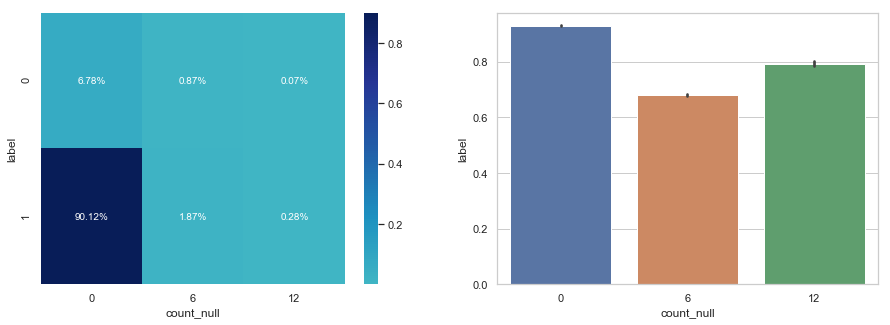

In [39]:
flash_analysis(train, 'count_null', 'label')

## Reemplzar cada -9999 por su media

In [40]:
detect_null = lambda x: 1 if x == -9999 else 0

for col in cols_null:
    mean_col = train[train[col] != -9999][col].mean()
    train[col] = train[col].apply(lambda x: mean_col if x == -9999 else x)
    test[col] = test[col].apply(lambda x: mean_col if x == -9999 else x)


In [41]:
display_horizontal(
    train.dtypes, test.dtypes
)

,0
id,int32
ncl[0],int16
ncl[1],int16
ncl[2],int8
ncl[3],int8
avg_cs[0],float32
avg_cs[1],float32
avg_cs[2],float32
avg_cs[3],float32
ndof,int8


In [42]:
lista_type = [col for col in train.columns if col.startswith('MatchedHit_TYPE')]
lista_type

['MatchedHit_TYPE[0]',
 'MatchedHit_TYPE[1]',
 'MatchedHit_TYPE[2]',
 'MatchedHit_TYPE[3]']

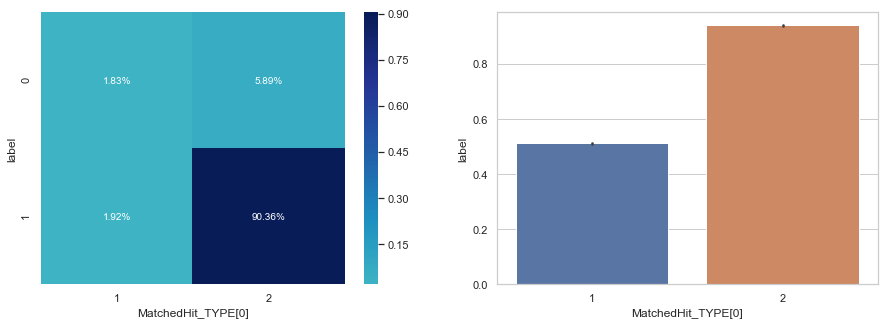

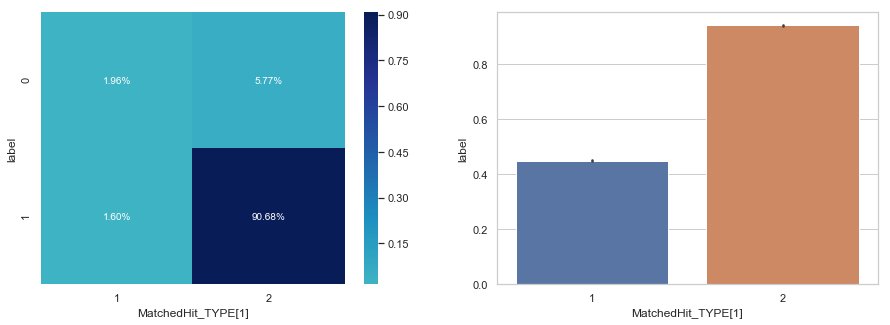

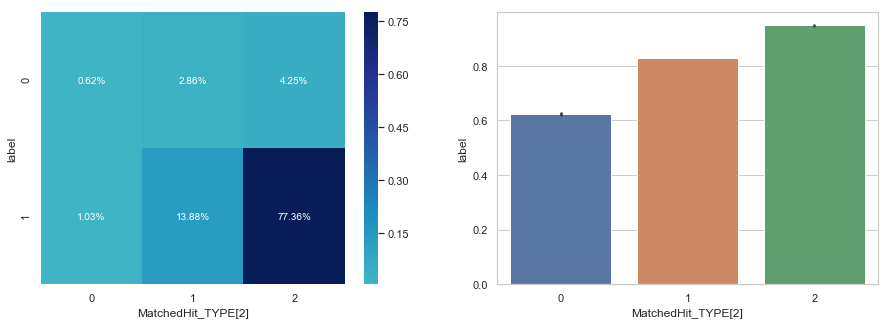

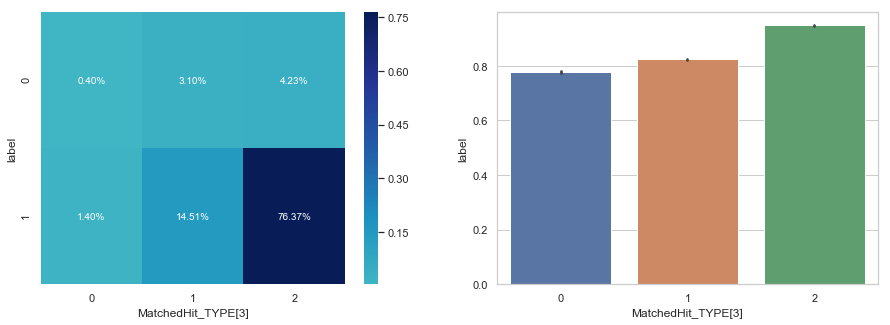

In [43]:
for col in lista_type:
    flash_analysis(train, col, 'label')

In [44]:
train, test = replace_value_ratio(train, test, lista_type, col_target='label', replace=False)

>>  MATCHEDHIT_TYPE[0]


MatchedHit_TYPE[0]
1   0.51
2   0.94
Name: label, dtype: float64

['2' '1']
['2' '1']
>>  MATCHEDHIT_TYPE[1]


MatchedHit_TYPE[1]
1   0.45
2   0.94
Name: label, dtype: float64

['2' '1']
['2' '1']
>>  MATCHEDHIT_TYPE[2]


MatchedHit_TYPE[2]
0   0.62
1   0.83
2   0.95
Name: label, dtype: float64

['2' '1' '0']
['2' '1' '0']
>>  MATCHEDHIT_TYPE[3]


MatchedHit_TYPE[3]
0   0.78
1   0.82
2   0.95
Name: label, dtype: float64

['2' '1' '0']
['2' '1' '0']


## Validando Correlacion 

In [45]:
del train['id']

In [46]:
corr_spearman = train.corr(method='spearman')

In [47]:
corr_detail(corr_spearman, min_value=0.75, show_detail=True)

ANALISIS CORRELACION ENTRE COLUMNAS :
//////////////////////////////
->  MatchedHit_DZ[2]  ::::  11
           MatchedHit_DX[0] 0.8833795622474591
           MatchedHit_DX[1] 0.8940286440838128
           MatchedHit_DX[2] 0.9732336639783904
           MatchedHit_DX[3] 0.9312907990498595
           MatchedHit_DY[0] 0.8866316901474418
           MatchedHit_DY[1] 0.896005317568802
           MatchedHit_DY[2] 0.9797215120085657
           MatchedHit_DY[3] 0.9328968749064999
           MatchedHit_DZ[0] 0.8866273542133586
           MatchedHit_DZ[1] 0.8960047373025359
           MatchedHit_DZ[3] 0.9171331170557437
//////////////////////////////
->  MatchedHit_DZ[3]  ::::  11
           MatchedHit_DX[0] 0.8674103878576085
           MatchedHit_DX[1] 0.8762546236260184
           MatchedHit_DX[2] 0.9334044020547881
           MatchedHit_DX[3] 0.9501376749614375
           MatchedHit_DY[0] 0.8742517374726705
           MatchedHit_DY[1] 0.8828320845270943
           MatchedHit_DY[2] 0.9342179910

In [48]:
train.columns

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

In [49]:
test.columns

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

In [51]:
train.to_csv('data_work/train_clean.csv', index=False)
test.to_csv('data_work/test_clean.csv', index=False)